In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import time
import matplotlib.patches as mpatches


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import   KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import collections


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report

from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold


import warnings

warnings.filterwarnings('ignore')

2023-06-21 15:15:43.209026: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-21 15:15:43.227661: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 15:15:43.313026: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 15:15:43.313473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 15:15:43.847839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print('Not Fraud :' ,round((df.Class.value_counts()[0]/len(df))*100,2),'%')
print('Fraud :' ,round((df.Class.value_counts()[1]/len(df))*100,2),'%')      

Not Fraud : 99.83 %
Fraud : 0.17 %


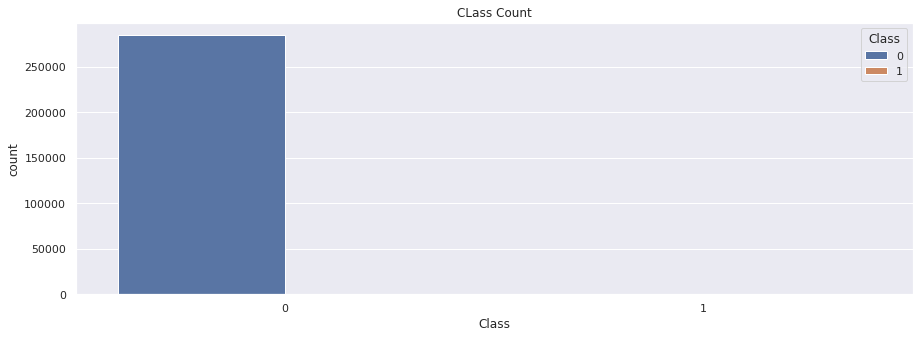

In [7]:
sns.set()
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Class',hue='Class')
plt.title("CLass Count")
plt.show()

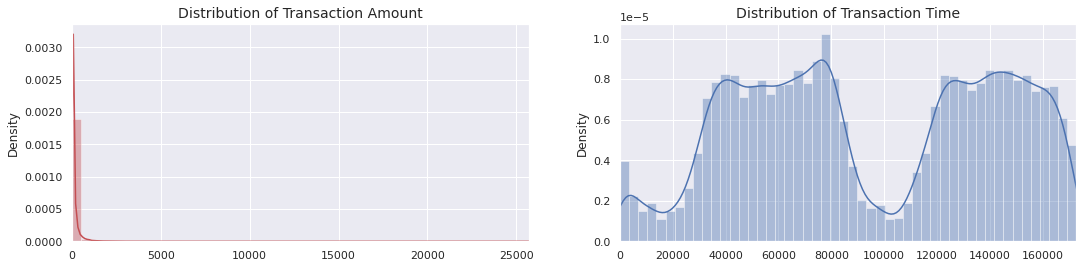

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler,RobustScaler

std_scaler=StandardScaler()
rob_scaler=RobustScaler()

df['scaled_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'],axis=1,inplace=True)

In [10]:
scaled_amount=df['scaled_amount']
scaled_time=df['scaled_time']

df.drop(['scaled_amount','scaled_time'],axis=1,inplace=True)

df.insert(0,'sclaed_amount',scaled_amount)
df.insert(1,'sclaed_time',scaled_time)

df.head()

,sclaed_amount,sclaed_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
df=df.sample(frac=1)

fraud_df=df.loc[df.Class==1]
non_fraud_df=df.loc[df.Class==0][:492]


normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

new_df=normal_distributed_df.sample(frac=1,random_state=8)

new_df.head()

,sclaed_amount,sclaed_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
6472,-0.293440,-0.904052,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,-3.955812,3.572055,-7.186452,0.147242,-5.249305,1.678334,-2.641473,-1.312059,-0.391716,1.118264,0.204138,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1
46998,2.546915,-0.489479,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,-2.961996,2.778968,-2.379600,0.918963,-4.015787,-0.530010,-2.815888,-6.649358,-1.746113,1.083407,0.168891,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,1
89706,1.641305,-0.258450,1.098938,-0.594323,-0.084485,-0.157655,-0.696053,-0.855108,0.135307,-0.258564,-1.584822,0.856963,1.311597,0.840521,0.568597,0.508994,-0.134640,-1.311415,-0.246485,0.950256,-0.407881,-0.209053,-0.587718,-1.576276,0.073851,0.293873,0.147109,0.137820,-0.067110,0.026319,0
206049,0.670579,0.603297,-2.228711,0.871699,0.614396,-0.670545,-0.592506,-0.387635,0.371132,0.128425,1.312465,0.717915,-1.196813,0.145445,0.465181,-0.749354,0.052081,0.271572,-0.670662,0.133718,-0.410010,0.176305,0.028660,0.986247,-0.323988,-0.020690,-0.210087,0.517713,-0.225960,-0.368102,0
280905,-0.135401,1.000200,-0.732090,0.830920,-0.515035,-0.571502,2.085345,-0.465505,0.862115,0.056428,-0.530226,-1.838899,0.896949,0.386620,0.305990,-2.702939,-1.580889,0.659068,1.456750,1.274400,-0.216768,0.130276,0.114011,0.386692,-0.436994,0.096652,0.404618,0.658103,0.056652,0.170267,0


Class
1    492
0    492
Name: count, dtype: int64


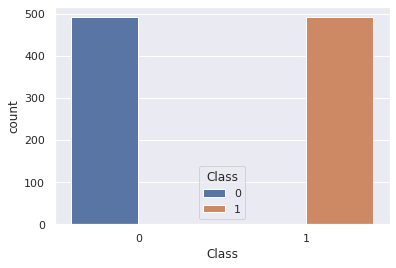

In [12]:
print(new_df.Class.value_counts())

sns.countplot(data=new_df,x='Class',hue='Class')
plt.show()


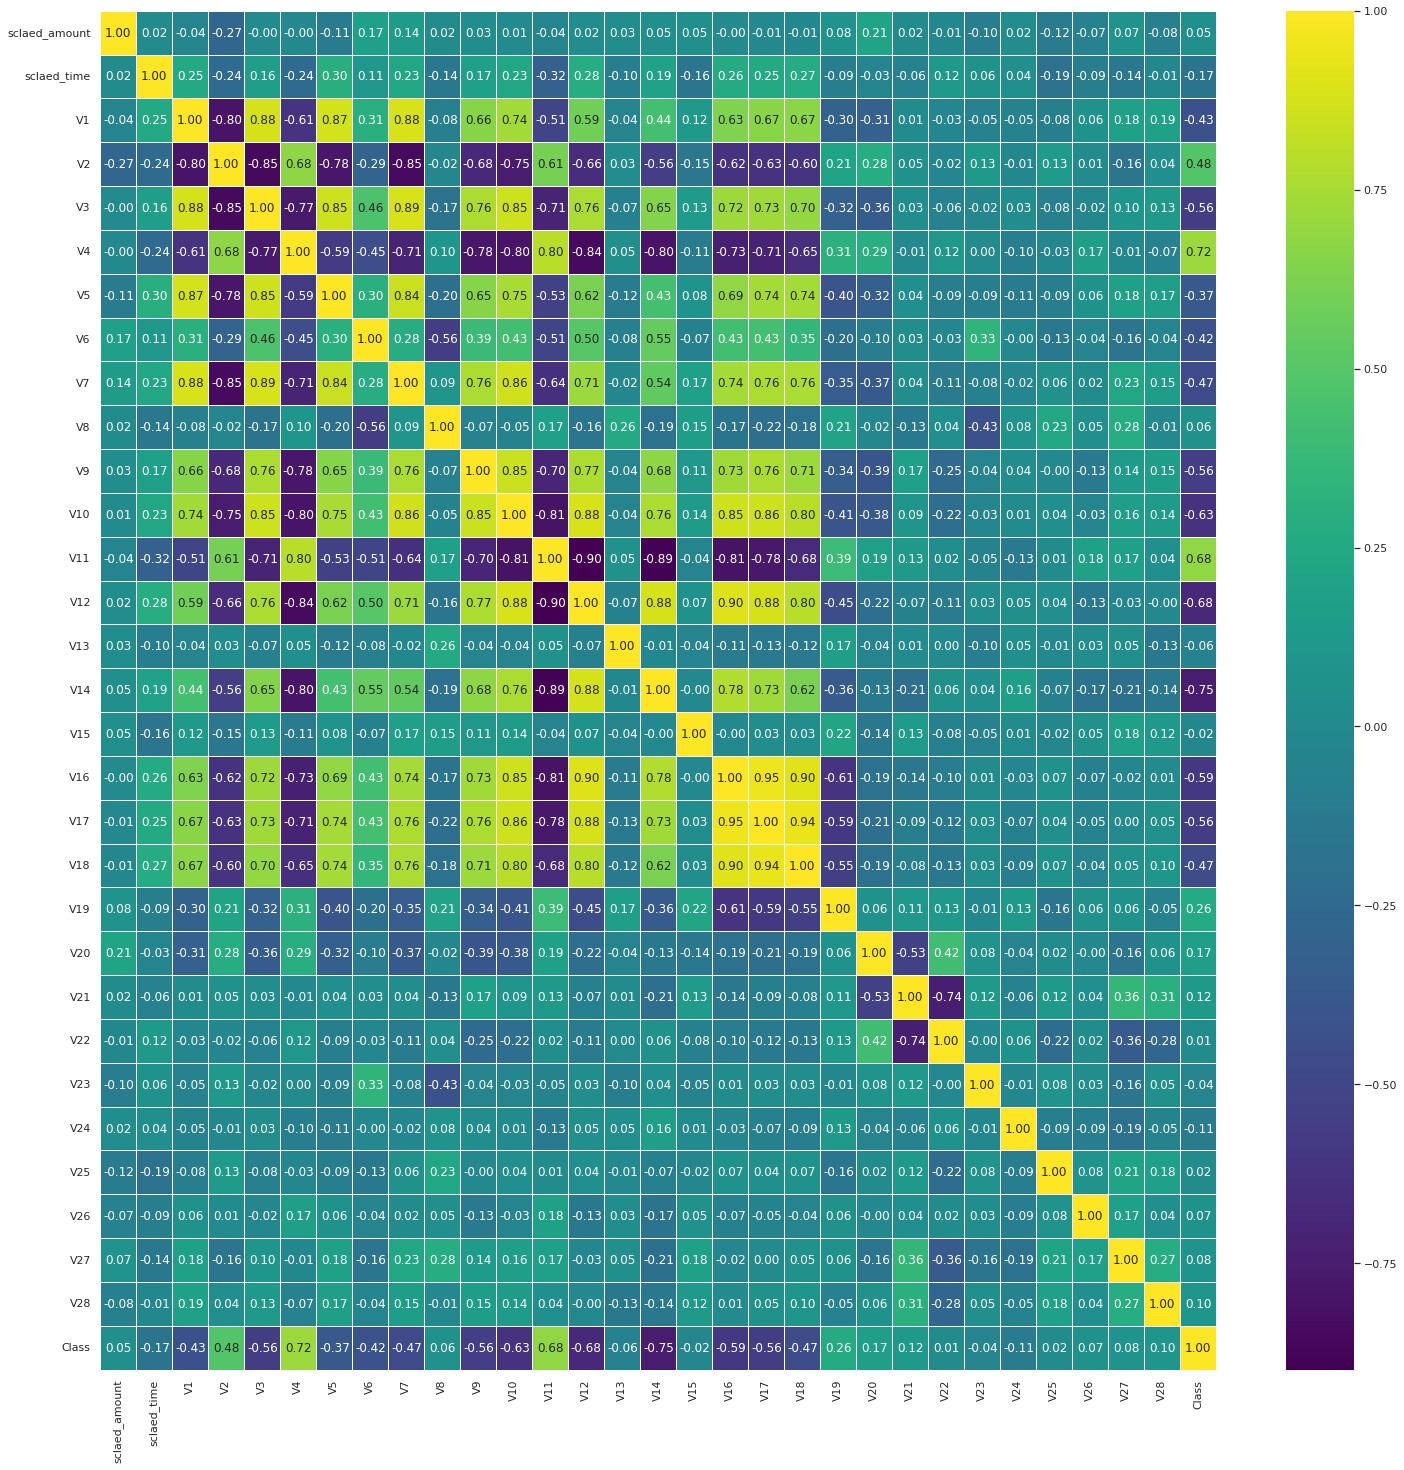

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(new_df.corr(),cmap='viridis',annot=True,linewidth=0.5,fmt='.2f')
plt.show()

Text(0.5, 1.0, 'V10')

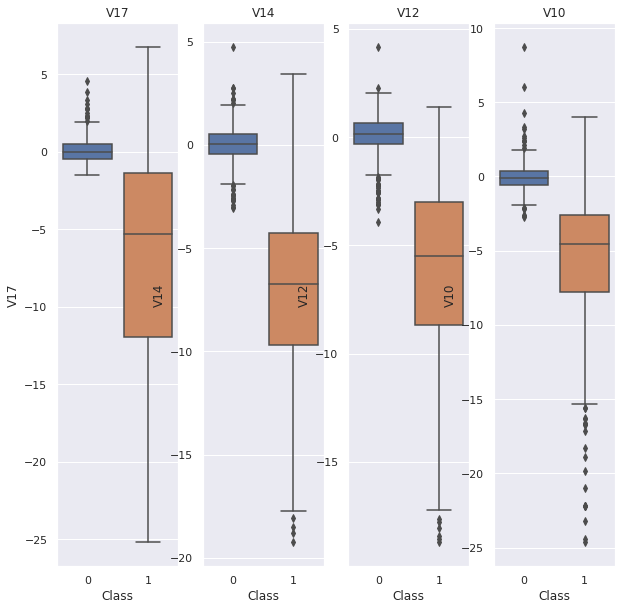

In [14]:
fig,ax=plt.subplots(1,4,figsize=(10,10))
sns.boxplot(data=new_df,x='Class',y='V17',ax=ax[0])
sns.boxplot(data=new_df,x='Class',y='V14',ax=ax[1])
sns.boxplot(data=new_df,x='Class',y='V12',ax=ax[2])
sns.boxplot(data=new_df,x='Class',y='V10',ax=ax[3])
ax[0].set_title('V17')
ax[1].set_title('V14')
ax[2].set_title('V12')
ax[3].set_title('V10')

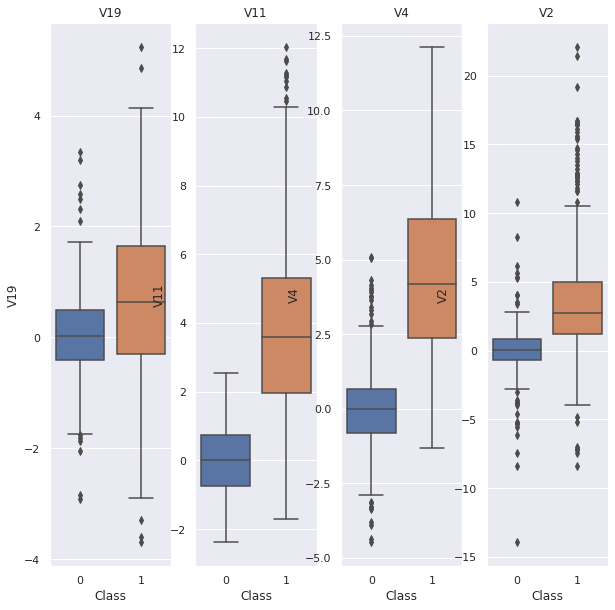

In [15]:
fig,ax=plt.subplots(1,4,figsize=(10,10))
sns.boxplot(data=new_df,x='Class',y='V19',ax=ax[0])
sns.boxplot(data=new_df,x='Class',y='V11',ax=ax[1])
sns.boxplot(data=new_df,x='Class',y='V4',ax=ax[2])
sns.boxplot(data=new_df,x='Class',y='V2',ax=ax[3])
ax[0].set_title('V19')
ax[1].set_title('V11')
ax[2].set_title('V4')
ax[3].set_title('V2')
plt.show()

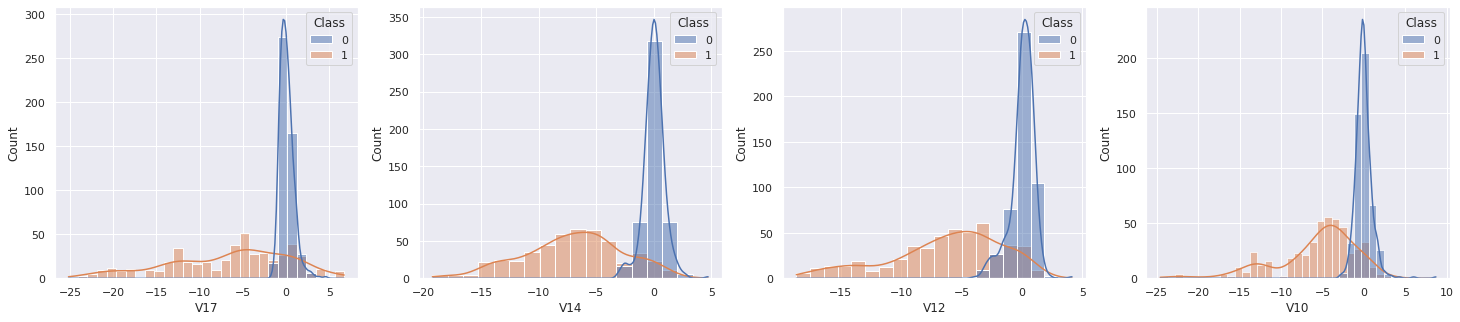

In [16]:
fig,ax=plt.subplots(1,4,figsize=(25,5))
sns.histplot(data=new_df,x='V17',kde=True,ax=ax[0],hue="Class",)
sns.histplot(data=new_df,x='V14',kde=True,ax=ax[1],hue="Class",)
sns.histplot(data=new_df,x='V12',kde=True,ax=ax[2],hue="Class",)
sns.histplot(data=new_df,x='V10',kde=True,ax=ax[3],hue="Class",)

plt.show()

In [17]:
v17_fraud=new_df['V17'].loc[new_df['Class']==1].values
v14_fraud=new_df['V14'].loc[new_df['Class']==1].values
v12_fraud=new_df['V12'].loc[new_df['Class']==1].values
v10_fraud=new_df['V10'].loc[new_df['Class']==1].values

v17_25,v17_75=np.percentile(v17_fraud,25),np.percentile(v17_fraud,75)
v14_25,v14_75=np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
v12_25,v12_75=np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
v10_25,v10_75=np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)

v17_iqr=v17_75-v17_25
v14_iqr=v14_75-v14_25
v12_iqr=v12_75-v12_25
v10_iqr=v10_75-v10_25


v17_lower,v17_upper=v17_25-1.5*v17_iqr,v17_75+1.5*v17_iqr
v14_lower,v14_upper=v14_25-1.5*v14_iqr,v14_75+1.5*v14_iqr
v12_lower,v12_upper=v12_25-1.5*v12_iqr,v12_75+1.5*v12_iqr
v10_lower,v10_upper=v10_25-1.5*v10_iqr,v10_75+1.5*v10_iqr




new_df=new_df.drop(new_df[(new_df['V17']>v17_upper) |( new_df['V17']<v17_lower)].index)
new_df=new_df.drop(new_df[(new_df['V14']>v14_upper) |( new_df['V14']<v14_lower)].index)
new_df=new_df.drop(new_df[(new_df['V12']>v12_upper) |( new_df['V12']<v12_lower)].index)
new_df=new_df.drop(new_df[(new_df['V10']>v10_upper) |( new_df['V10']<v10_lower)].index)


Text(0.5, 1.0, 'V10')

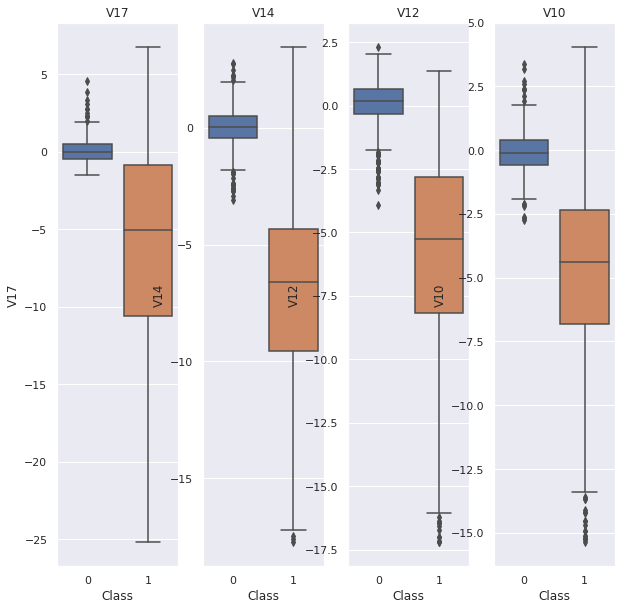

In [18]:
fig,ax=plt.subplots(1,4,figsize=(10,10))
sns.boxplot(data=new_df,x='Class',y='V17',ax=ax[0])
sns.boxplot(data=new_df,x='Class',y='V14',ax=ax[1])
sns.boxplot(data=new_df,x='Class',y='V12',ax=ax[2])
sns.boxplot(data=new_df,x='Class',y='V10',ax=ax[3])
ax[0].set_title('V17')
ax[1].set_title('V14')
ax[2].set_title('V12')
ax[3].set_title('V10')

In [19]:
X=new_df.drop('Class',axis=1)
y=new_df.Class

In [20]:
%time

X_reduced_tsne=TSNE(n_components=2).fit_transform(X)
X_reduced_tsne.shape

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.34 µs


(954, 2)

In [21]:
%time

X_reduced_pca=PCA(n_components=2).fit_transform(X)
X_reduced_pca.shape

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


(954, 2)

In [22]:
%time 

X_reduced_svd=TruncatedSVD(n_components=2,algorithm='randomized').fit_transform(X)
X_reduced_svd.shape

CPU times: user 28 µs, sys: 9 µs, total: 37 µs
Wall time: 4.29 µs


(954, 2)

<Axes: >

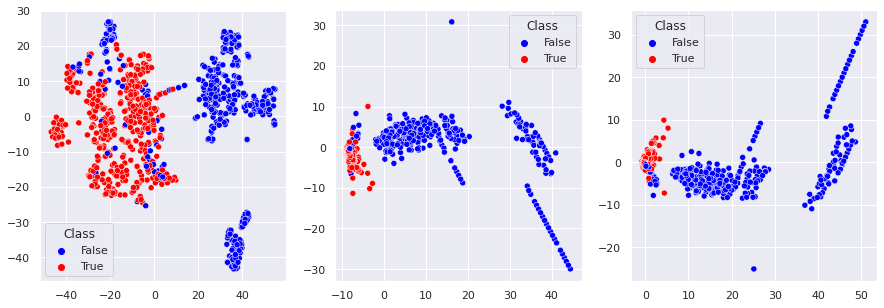

In [23]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=X_reduced_tsne[:,0],y=X_reduced_tsne[:,1],ax=ax[0],hue=(y==0),palette=['blue','red'])
sns.scatterplot(x=X_reduced_pca[:,0],y=X_reduced_pca[:,1],ax=ax[1],hue=(y==0),palette=['blue','red'])
sns.scatterplot(x=X_reduced_svd[:,0],y=X_reduced_svd[:,1],ax=ax[2],hue=(y==0),palette=['blue','red'])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
classifiers={
    'LogisticRegression':LogisticRegression(),
    'KNearest':KNeighborsClassifier(),
    'Support Vector Classifier':SVC(),
    'DecisionTreeClassifer':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
}

In [26]:
from sklearn.model_selection import cross_val_score

for name,clf in classifiers.items():
    train_score=cross_val_score(clf,X_train,y_train,cv=5)
    print(f'{name} :',np.mean(train_score))

LogisticRegression : 0.9488992088063295
KNearest : 0.9239852081183351
Support Vector Classifier : 0.9344685242518059
DecisionTreeClassifer : 0.9044031647746819
RandomForestClassifier : 0.9371173030615754


In [27]:
from sklearn.model_selection import GridSearchCV

log_p={
    'penalty':['l1','l2'],
    'C':[0.001,0.01,0.1,1,10,100,1000]
}

knn_p={"n_neighbors": list(range(2,5,1)), 
       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

svc_p={'C': [0.1,0.5, 0.7, 0.9, 1],
        'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
        'gamma':[0.01,0.1,1,10,100]
}

tree_p={"criterion": ["gini", "entropy"],
        "max_depth": list(range(2,4,1)), 
        "min_samples_leaf": list(range(5,7,1))
    
}

rf_p={"criterion": ["gini", "entropy"],
      "max_depth": list(range(2,4,1)), 
      "min_samples_leaf": list(range(5,7,1))}



log_grid=GridSearchCV(LogisticRegression(),log_p)
log_grid.fit(X_train,y_train)
best_log=log_grid.best_estimator_
print(log_grid.best_params_)


knn_grid=GridSearchCV(KNeighborsClassifier(),knn_p)
knn_grid.fit(X_train,y_train)
best_knn=knn_grid.best_estimator_
print(knn_grid.best_params_)

svc_grid=GridSearchCV(SVC(),svc_p)
svc_grid.fit(X_train,y_train)
best_svc=svc_grid.best_estimator_
print(svc_grid.best_params_)

tree_grid=GridSearchCV(DecisionTreeClassifier(),tree_p)
tree_grid.fit(X_train,y_train)
best_tree=tree_grid.best_estimator_
print(tree_grid.best_params_)

rf_grid=GridSearchCV(RandomForestClassifier(),rf_p)
rf_grid.fit(X_train,y_train)
best_rf=rf_grid.best_estimator_
print(rf_grid.best_params_)


{'C': 1, 'penalty': 'l2'}
{'algorithm': 'auto', 'n_neighbors': 2}
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}


In [28]:
log_cv=cross_val_score(best_log,X_train,y_train,cv=5)
print('LogisticRegression     :',log_cv,'     ',np.mean(log_cv))

knn_cv=cross_val_score(best_knn,X_train,y_train,cv=5)
print('KNN                    :',knn_cv,'     ',np.mean(knn_cv))

svc_cv=cross_val_score(best_svc,X_train,y_train,cv=5)
print("SVC                    :",svc_cv,'     ',np.mean(svc_cv))

tree_cv=cross_val_score(best_tree,X_train,y_train,cv=5)
print("DesicionTreeClassifier :",tree_cv,'     ',np.mean(tree_cv))

rf_cv=cross_val_score(best_rf,X_train,y_train,cv=5)
print('RandomForestClassifier :',rf_cv,'     ',np.mean(rf_cv))


LogisticRegression     : [0.92810458 0.94771242 0.96078431 0.94736842 0.96052632]       0.9488992088063295
KNN                    : [0.90196078 0.91503268 0.94771242 0.94736842 0.91447368]       0.9253095975232197
SVC                    : [0.93464052 0.94117647 0.94771242 0.96052632 0.93421053]       0.9436532507739936
DesicionTreeClassifier : [0.91503268 0.92810458 0.93464052 0.96052632 0.92763158]       0.9331871345029239
RandomForestClassifier : [0.90196078 0.91503268 0.93464052 0.96052632 0.92763158]       0.9279583763329893


In [29]:
from sklearn.model_selection import cross_val_predict

log_cv=cross_val_predict(best_log,X_train,y_train,cv=5)

knn_cv=cross_val_predict(best_knn,X_train,y_train,cv=5)

svc_cv=cross_val_predict(best_svc,X_train,y_train,cv=5)

tree_cv=cross_val_predict(best_tree,X_train,y_train,cv=5)

rf_cv=cross_val_predict(best_rf,X_train,y_train,cv=5)



In [30]:
print('Logistic Regression: ', roc_auc_score(y_train, log_cv))
print('KNears Neighbors: ', roc_auc_score(y_train, knn_cv))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_cv))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_cv))
print('Random Forest Classifier: ', roc_auc_score(y_train, rf_cv))

Logistic Regression:  0.9483254246613025
KNears Neighbors:  0.9237638401760538
Support Vector Classifier:  0.942840932535589
Decision Tree Classifier:  0.9317137748435459
Random Forest Classifier:  0.9286947252596108


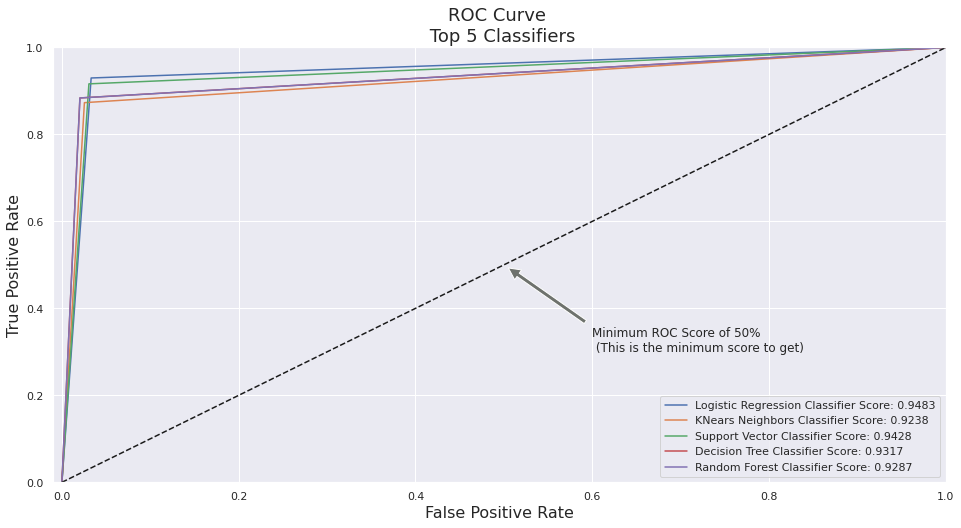

In [31]:
from sklearn.metrics import roc_curve


log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_cv)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train,knn_cv)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_cv)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_cv)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_cv)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rf_fpr,rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_cv)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knn_cv)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_cv)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_cv)))
    plt.plot(tree_fpr, tree_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_cv)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rf_fpr,rf_tpr)
plt.show()

In [32]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train,log_cv)

In [33]:
y_pred=best_log.predict(X_train)

In [34]:
print('-' *30)
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('-' *30)

------------------------------
Recall Score: 0.93
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.96
------------------------------


In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

763 763
191 191


In [57]:
X=df.drop('Class',axis=1)
y=df.Class


sss=StratifiedKFold(n_splits=5)
for train_index,test_index in sss.split(X,y):
    original_Xtrain,original_Xtest=X.iloc[train_index],X.iloc[test_index]
    original_ytrain,original_ytest=y.iloc[train_index],y.iloc[test_index]

In [58]:
print(len(original_Xtrain),len(original_ytrain))
print(len(original_Xtest),len(original_ytest))

227846 227846
56961 56961


In [59]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [60]:
log=LogisticRegression()
log_p={"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log=RandomizedSearchCV(log,log_p,n_iter=4)

for train_index,test_index in sss.split(original_Xtrain,original_ytrain):
    pipeline=imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),rand_log)
    model=pipeline.fit(original_Xtrain.iloc[train_index],original_ytrain.iloc[train_index])
    best_log=rand_log.best_estimator_
    prediction=best_log.predict(original_Xtrain.iloc[test_index])
    accuracy_lst.append(pipeline.score(original_Xtrain.iloc[test_index], original_ytrain.iloc[test_index]))
    precision_lst.append(precision_score(original_ytrain.iloc[test_index], prediction))
    recall_lst.append(recall_score(original_ytrain.iloc[test_index], prediction))
    f1_lst.append(f1_score(original_ytrain.iloc[test_index], prediction))
    auc_lst.append(roc_auc_score(original_ytrain.iloc[test_index], prediction))

In [61]:
print('-' * 30)
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('-' * 30)

------------------------------
accuracy: 0.9752683836066114
precision: 0.06014732958564645
recall: 0.9035702693930542
f1: 0.11273542569836681
------------------------------


In [63]:
labels=['No Fraud','Fraud']
smote_prediction=best_log.predict(original_Xtest)
print(classification_report(original_ytest,smote_prediction,target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56863
       Fraud       0.06      0.91      0.11        98

    accuracy                           0.97     56961
   macro avg       0.53      0.94      0.55     56961
weighted avg       1.00      0.97      0.99     56961



In [69]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [70]:
%time

best_log.fit(Xsm_train,ysm_train)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


LogisticRegression(C=1)

In [72]:
log_p=best_log.predict(X_test)
knn_p=best_knn.predict(X_test)
svc_p=best_svc.predict(X_test)
tree_p=best_tree.predict(X_test)
rf_p=best_rf.predict(X_test)

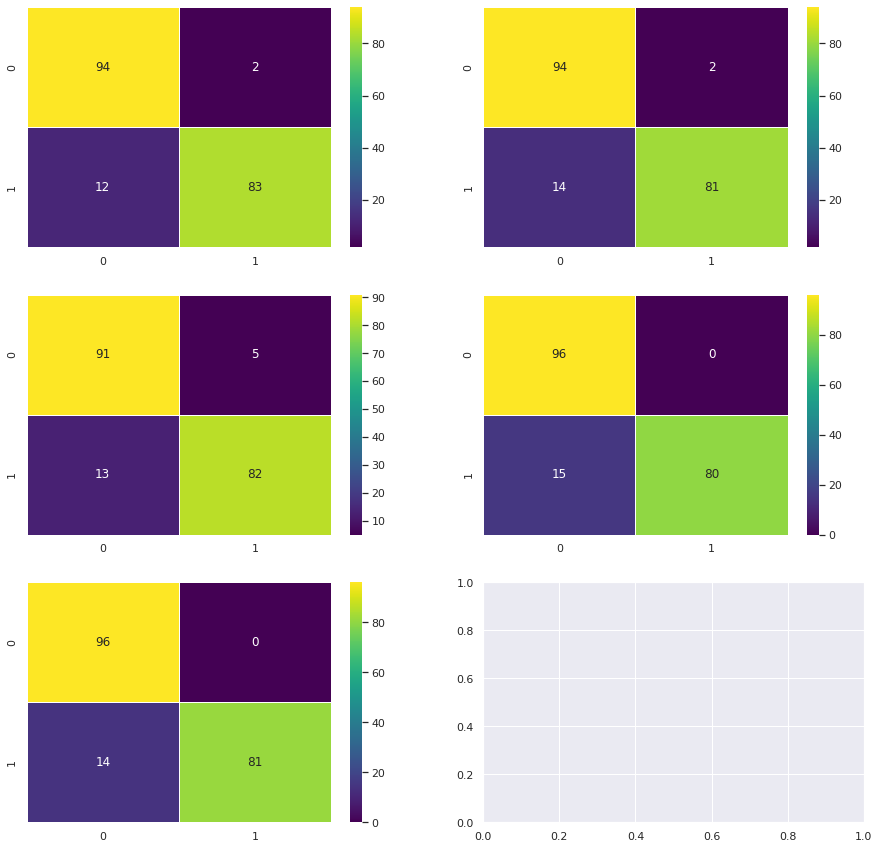

In [80]:
from sklearn.metrics import confusion_matrix

log_cf=confusion_matrix(y_test,log_p)
knn_cf=confusion_matrix(y_test,knn_p)
svc_cf=confusion_matrix(y_test,svc_p)
tree_cf=confusion_matrix(y_test,tree_p)
rf_cf=confusion_matrix(y_test,rf_p)

fig,ax=plt.subplots(3,2,figsize=(15,15))
ax=ax.flatten()

sns.heatmap(log_cf,annot=True,linewidth=0.5,cmap='viridis',ax=ax[0])
sns.heatmap(knn_cf,annot=True,linewidth=0.5,cmap='viridis',ax=ax[1])
sns.heatmap(svc_cf,annot=True,linewidth=0.5,cmap='viridis',ax=ax[2])
sns.heatmap(tree_cf,annot=True,linewidth=0.5,cmap='viridis',ax=ax[3])
sns.heatmap(rf_cf,annot=True,linewidth=0.5,cmap='viridis',ax=ax[4])
plt.show()